# Anomaly Detection Through Clustering Exercises
1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [1]:
#imports
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
import seaborn as sns
# sklearn for scaling and clustering:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# import custom modules
import prepare as p

### 1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.


In [2]:
# import database
database = 'grocery_db'
query = 'SELECT * FROM grocery_customers'


df = p.get_any_data(database, query)

In [3]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
p.overview(df)

============== customer_id ==============
# Unique Vals: 440

============== Channel ==============
# Unique Vals: 2
1    298
2    142
Name: Channel, dtype: int64

============== Region ==============
# Unique Vals: 3
1     77
2     47
3    316
Name: Region, dtype: int64

============== Fresh ==============
# Unique Vals: 433

============== Milk ==============
# Unique Vals: 421

============== Grocery ==============
# Unique Vals: 430

============== Frozen ==============
# Unique Vals: 426

============== Detergents_Paper ==============
# Unique Vals: 417

============== Delicassen ==============
# Unique Vals: 403



In [5]:
# pick features we want to look at
selected_feats = ['Frozen', 'Grocery', 'Delicassen']

In [6]:
# pretend we are already working with just the train set

# create dataframe with selected features
selected_feats_df = df[selected_feats]

In [7]:
# scale data
# make scaler
mm_scaler = MinMaxScaler()

# fit scaler
mm_scaler.fit(selected_feats_df)

# use scaler
selected_feats_df = mm_scaler.fit_transform(selected_feats_df)

selected_feats_df

array([[0.0031063 , 0.08146416, 0.02784731],
       [0.02854842, 0.10309667, 0.03698373],
       [0.03911643, 0.08278992, 0.16355861],
       ...,
       [0.00677142, 0.32594285, 0.03888194],
       [0.01664914, 0.02402535, 0.04426366],
       [0.00065742, 0.02702178, 0.00102211]])

In [8]:
# DBSCAN

# make dbScan
dbscan = DBSCAN(eps = 0.1, min_samples=20)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.1, min_samples=20)

In [9]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + feat for feat in selected_feats]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(selected_feats_df, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Grocery,Scaled_Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.081464,0.027847
1,1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.103097,0.036984
2,2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.082790,0.163559
3,3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.045464,0.037234
4,4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.077552,0.108093


In [10]:
# lets look at the lables
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [11]:
# add labels to dataframe
df['labels'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

- Looks like there is 1 cluster (0)
- And there are 14 outliers 
- Next step to visualize

<AxesSubplot:xlabel='Frozen', ylabel='Grocery'>

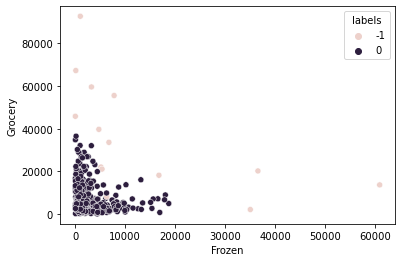

In [12]:
# scatter plot of 2 of the variables 
%matplotlib inline
sns.scatterplot(data = df, x = 'Frozen', y = 'Grocery', hue = 'labels')

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

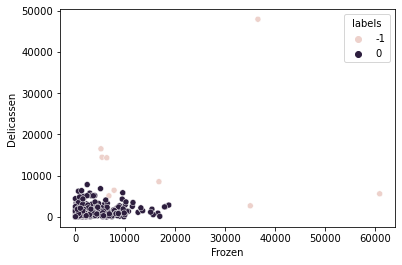

In [13]:
sns.scatterplot(data = df, x = 'Frozen', y = 'Delicassen', hue = 'labels')

<AxesSubplot:xlabel='Grocery', ylabel='Delicassen'>

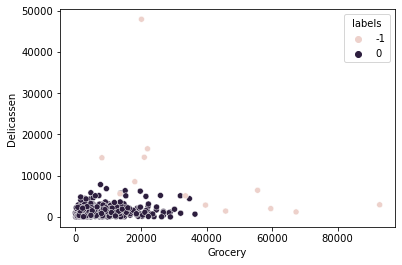

In [14]:
sns.scatterplot(data = df, x = 'Grocery', y = 'Delicassen', hue = 'labels')

In [15]:
# try 3d plotting 
# will create popout (need to comment out when you want to graph again)
%matplotlib qt


# set up figure
fig = plt.figure(1, figsize = (10,10))

# wrap in 3d axis
ax = Axes3D(fig)

# plot scatter using ax object
ax.scatter(df.Frozen,
          df.Grocery,
          df.Delicassen,
          c = df.labels,
          edgecolor = 'k')

ax.set_xlabel('Frozen')
ax.set_ylabel('Grocery')
ax.set_zlabel('Delicassen')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, '')]

### Takeaways
- Seems to be some points that aren't actually outliers
- Will run again tweaking the hyper parameters

In [16]:
# DBSCAN with eps as 0.2

# make dbScan
dbscan = DBSCAN(eps = 0.2, min_samples=20)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.2, min_samples=20)

In [17]:
# add labels to dataframe
df['labels2'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

In [18]:
# DBSCAN with different hyper parameters

# make dbScan
dbscan = DBSCAN(eps = 0.7, min_samples=5)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.7)

In [19]:
# add labels to dataframe
df['labels2'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

### Takeaways Hyperparameters
- Looks like when I change the hyper parameters there are still 14 outliers
- Would have to look into some dbscan model selector stuff to see how to run through those hyper parameters

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [68]:
def acquire_curriculum_logs(csv_name = "anonymized-curriculum-access-07-2021.txt"):
    '''
    This function reads the csv of curriculum access logs
    If the file name needs to be changed change the default arguement
    '''
    # assign column names to use
    colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
    # read csv
    df = pd.read_csv(csv_name, 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
    return df

def make_datetime_index(df, col_name):
    '''
    This function takes in a dataframe 
    A column name of the column that is your date (as string)
    Performs basic to_datetime conversion and sets tha column as the index
    '''
    
    df[col_name] = pd.to_datetime(df[col_name])

    df = df.set_index(col_name)
    
    return df

def prep(df):
    '''
    This function takes in the curriculum log data, and the user number you want to look at
    returns a dataframe of the pages they accessed and when
    '''
    #df = df[df.user_id == user]
    df = make_datetime_index(df, 'date')
    pages = df['endpoint'].resample('d').count()
    return pages

In [22]:
df = acquire_curriculum_logs() 

<ipython-input-21-5693e0a9137a>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_name,


In [23]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [33]:
dbase = 'curriculum_logs'
sqlquery = 'SELECT * FROM cohorts'

cohorts = p.get_any_data(dbase, sqlquery)

### Brainstorming
- Resample by day to see number of pages accessed per day
    - Number of pages accessed by user id or IP 
    - Number of pages accessed by each cohort
- Number of times page accessed value counts 
- Create a variable for data science and web development 

In [69]:
df_2 = prep(df)

In [70]:
df_2.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

In [99]:
%matplotlib inline

df.groupby(['date', 'source_ip']).count()

endpoint  user_id  cohort_id
date       source_ip                                    
2018-01-26 104.193.225.250         2        2          2
           107.77.100.125          3        3          3
           12.189.101.90           4        4          4
           12.247.3.42            18       18         18
           172.3.220.202           1        1          1
...                              ...      ...        ...
2021-07-15 98.6.122.83             6        6          6
           99.156.86.156           4        4          4
           99.43.138.137           3        3          3
           99.66.110.207           2        2          2
           99.76.131.43            3        3          3

[68832 rows x 3 columns]

In [76]:
df[['user_id', 'source_ip']].groupby('source_ip').count()

,user_id
source_ip,
100.11.170.135,114
100.19.73.35,408
100.35.67.162,11
103.137.12.164,9
103.208.220.130,1
...,...
99.98.245.245,2
99.98.32.165,267
99.98.32.97,46


In [77]:
df[['user_id', 'source_ip']].groupby('user_id').count()

,source_ip
user_id,
1,8190
2,1541
3,1562
4,692
5,1701
...,...
1078,44
1079,60
1080,27


In [81]:
cohorts

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
5,6,Franklin,#franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
6,7,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
7,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
8,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4
9,10,Balboa,#balboa,2015-11-03,2016-03-11,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4


In [102]:
# create dataframe of date and endpoint reset index
pages_by_day = df[['date', 'endpoint']].groupby('date').count().reset_index()

In [104]:
# rename endpoint column
pages_by_day = pages_by_day.rename(columns = {'endpoint': 'pages_accessed'})

In [105]:
np.array(pages_by_day)

array([[Timestamp('2018-01-26 00:00:00'), 572],
       [Timestamp('2018-01-27 00:00:00'), 230],
       [Timestamp('2018-01-28 00:00:00'), 170],
       ...,
       [Timestamp('2021-07-13 00:00:00'), 1956],
       [Timestamp('2021-07-14 00:00:00'), 1538],
       [Timestamp('2021-07-15 00:00:00'), 919]], dtype=object)

#### can't scale timestamp back to the drawing board

In [111]:
user_count_by_day = df[['date', 'user_id']].groupby('date').nunique()

In [113]:
ip_count_by_day = df[['date', 'source_ip']].groupby('date').nunique()

In [118]:
# combine all these dataframes

by_day_df = pages_by_day.merge(user_count_by_day, on = user_count_by_day.index)

In [127]:
by_day_df = by_day_df.drop(columns = 'key_0')

In [130]:
by_day_df = by_day_df.merge(ip_count_by_day, on = ip_count_by_day.index)

In [131]:
by_day_df = by_day_df.drop(columns = 'key_0')

In [132]:
by_day_df

,date,pages_accessed,user_id,source_ip
0,2018-01-26,572,50,13
1,2018-01-27,230,18,20
2,2018-01-28,170,19,20
3,2018-01-29,830,61,27
4,2018-01-30,652,61,31
...,...,...,...,...
1262,2021-07-11,708,79,83
1263,2021-07-12,2073,181,182
1264,2021-07-13,1956,208,218
1265,2021-07-14,1538,171,172


In [159]:
features = ['pages_accessed', 'user_id', 'source_ip']

stuff_by_day = by_day_df[features]

In [160]:
# scale data
# make scaler
mm_scaler = MinMaxScaler()

# fit scaler
mm_scaler.fit(stuff_by_day)

# use scaler
scaled_df = mm_scaler.fit_transform(stuff_by_day)

scaled_df

array([[0.16791156, 0.2254902 , 0.04205607],
       [0.0657305 , 0.06862745, 0.07476636],
       [0.047804  , 0.07352941, 0.07476636],
       ...,
       [0.58141619, 1.        , 1.        ],
       [0.45652823, 0.81862745, 0.78504673],
       [0.2715865 , 0.76470588, 0.72429907]])

In [164]:
# DBSCAN

# make dbScan
dbscan = DBSCAN(eps = 0.1, min_samples=20)

# fit dbscan
dbscan.fit(scaled_df)

DBSCAN(eps=0.1, min_samples=20)

In [165]:
# add labels to dataframe
by_day_df['labels'] = dbscan.labels_
by_day_df.labels.value_counts()

 0    1253
-1      14
Name: labels, dtype: int64

### Takeaways
- For some reason everything is an outlier
- 

<AxesSubplot:xlabel='user_id', ylabel='pages_accessed'>

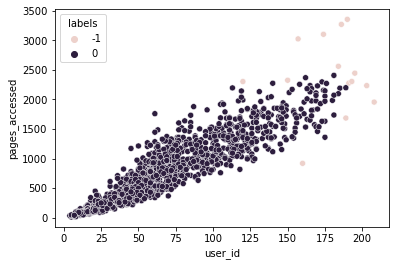

In [172]:
%matplotlib inline
sns.scatterplot(data = by_day_df , x = 'user_id', y = 'pages_accessed', hue = 'labels')

<AxesSubplot:xlabel='user_id', ylabel='source_ip'>

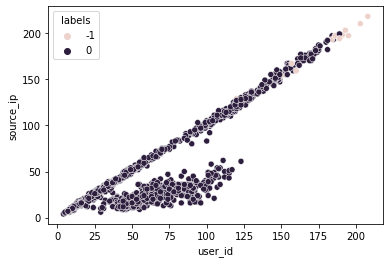

In [173]:
sns.scatterplot(data = by_day_df , x = 'user_id', y = 'source_ip', hue = 'labels')

In [182]:
def plot_3d_3variables(df, var_list, label):
    '''
    This function takes in a dataframe
    variable list of the 3 variables you want to graph
    label = string of the name of the column you have your labels in 
    automatically sets matplotlib qt thingy so it'll popout
    '''
    %matplotlib qt
    # set up variables from the varlist
    var1 = var_list[0]
    var2 = var_list[1]
    var3 = var_list[2]
    
    # set up figure
    fig = plt.figure(1, figsize = (10,10))

    # wrap in 3d axis
    ax = Axes3D(fig)

    # plot scatter using ax object
    ax.scatter(df[var1],
              df[var2],
              df[var3],
              c = df[label],
              edgecolor = 'k')

    ax.set_xlabel(f'{var1}')
    ax.set_ylabel(f'{var2}')
    ax.set_zlabel(f'{var3}')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [181]:
# plot in 3 dimensions 
var_list = ['pages_accessed', 'user_id', 'source_ip']

plot_3d_3variables(by_day_df, var_list, 'labels')

### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).